## Task 1: Importing necessary libraries

In [1]:
# importing libraries
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (8,6)

## Task 2: Data Preprocessing

In [3]:
# Loading the dataset
hr = pd.read_csv('employee_data.csv')

In [4]:
# dimensionality of the dataset
hr.shape

(11582, 10)

In [5]:
# data types of each column
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [6]:
# information about the dataset
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11582 non-null  float64
 1   last_evaluation        11582 non-null  float64
 2   number_project         11582 non-null  int64  
 3   average_montly_hours   11582 non-null  int64  
 4   time_spend_company     11582 non-null  int64  
 5   Work_accident          11582 non-null  int64  
 6   quit                   11582 non-null  int64  
 7   promotion_last_5years  11581 non-null  float64
 8   department             11581 non-null  object 
 9   salary                 11581 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 905.0+ KB


In [7]:
# first 10 rows of the dataset
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low
5,0.41,0.50,2,153,3,0,1,0.0,sales,low
6,0.10,0.77,6,247,4,0,1,0.0,sales,low
7,0.92,0.85,5,259,5,0,1,0.0,sales,low
8,0.89,1.00,5,224,5,0,1,0.0,sales,low
9,0.42,0.53,2,142,3,0,1,0.0,sales,low


In [8]:
# summary statistics for the dataset
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11581.000000
mean,0.628308,0.716608,3.802884,200.523053,3.305215,0.152651,0.172682,0.013816
std,0.241985,0.168828,1.169843,48.839268,1.209369,0.359666,0.377988,0.116731
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


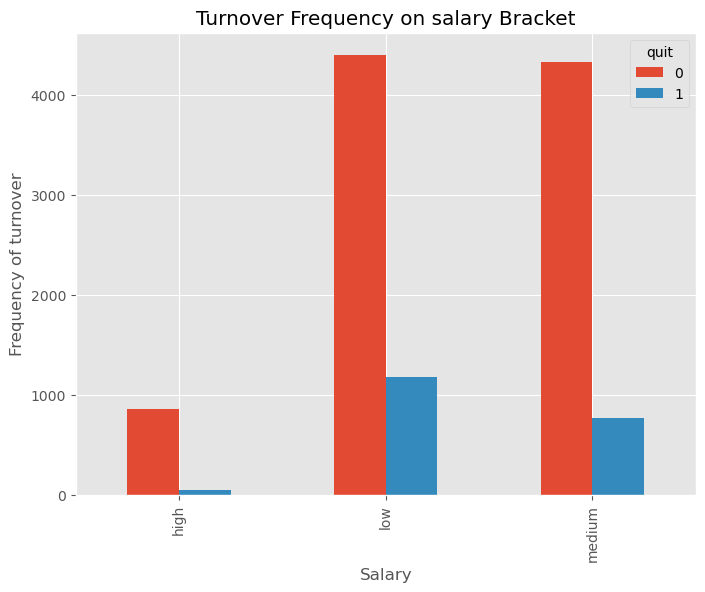

In [9]:
# Visualizing class imbalance by plotting turnover frequency based on salary
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title("Turnover Frequency on salary Bracket")
plt.xlabel('Salary')
plt.ylabel('Frequency of turnover')
plt.show()

In [10]:
# finding mode for a particular column
hr['promotion_last_5years'].mode()

0    0.0
Name: promotion_last_5years, dtype: float64

In [11]:
# Checking for missing values
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

In [12]:
# displaying the missing values
hr[hr.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
11581,0.57,0.93,2,204,10,0,0,NaN,NaN,NaN


In [13]:
# dropping null values as they're less than 5% of the dataset
hr = hr.dropna(how='any',axis=0) 

In [14]:
# null values have been dropped 
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

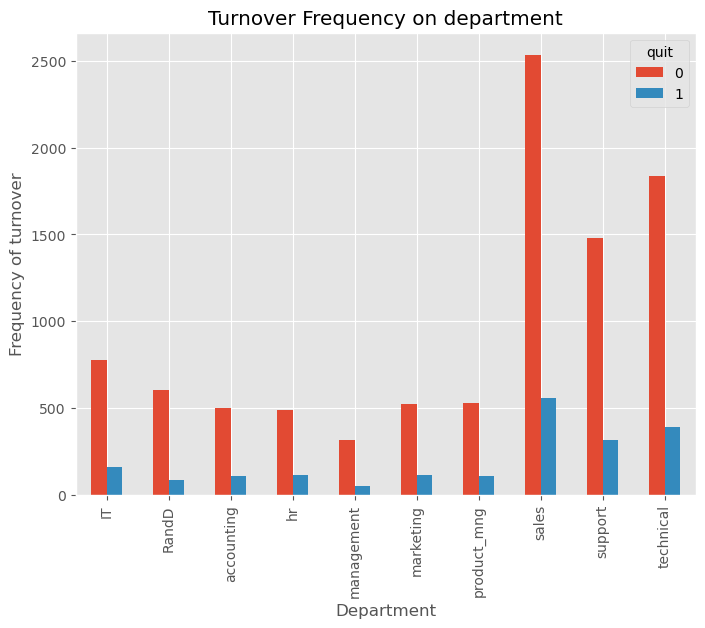

In [15]:
# plotting turnover frequency by department
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title("Turnover Frequency on department")
plt.xlabel('Department')
plt.ylabel('Frequency of turnover')
plt.show()

## Task 3: Encoding categorical variables

In [16]:
# one-hot enconding categorical varibales
cat_vars=['department','salary']
for i in cat_vars:
    cat_list=pd.get_dummies(hr[i], prefix=i)
    hr=hr.join(cat_list)

In [17]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [18]:
# dropping the original categorical columns
hr.drop(columns=['department','salary'],axis=1,inplace=True)

In [19]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576,0.97,0.51,5,215,7,0,0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,0
11577,0.55,0.78,4,261,3,0,0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,0
11578,0.76,0.56,5,222,10,0,0,0.0,0,0,...,0,1,0,0,0,0,0,1,0,0
11579,0.53,0.99,3,223,10,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
hr_new = hr.drop('satisfaction_level', axis=1)

In [21]:
hr_new.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,157,3,0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,262,6,0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,272,4,0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,223,5,0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,159,3,0,1,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Task 4: Visualizing class imbalance

In [22]:
!pip install yellowbrick

In [23]:
# importing yellowbrick for visualizing class imbalance
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (8,6)

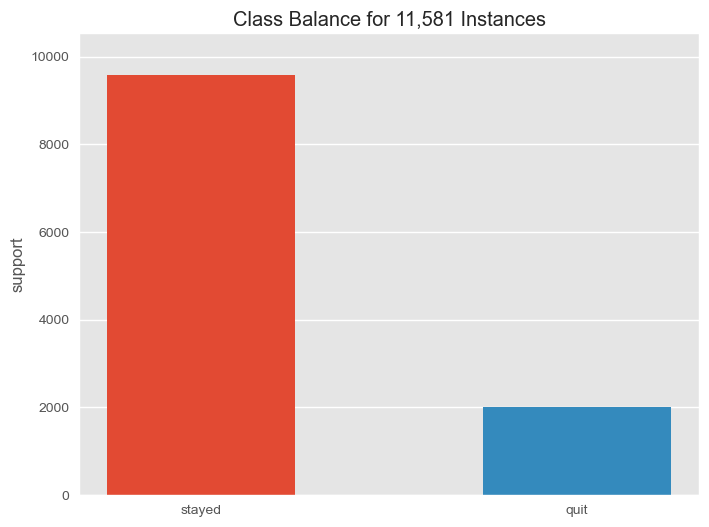

<Axes: title={'center': 'Class Balance for 11,581 Instances'}, ylabel='support'>

In [24]:
visualizer=ClassBalance(labels=['stayed','quit']).fit(hr_new.quit)
visualizer.show()

## Task 5: Creating training & test sets

In [25]:
# defining feature variables(x) & target variable(y)
x=hr_new.loc[:,hr_new.columns !='quit']
y=hr_new.quit

In [26]:
# splitting into training and test sets using stratified sampling
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

## Task 6: Building an Interactive Decision Tree Classifier

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [28]:
pip install scikit-learn==1.2.2 --user

Note: you may need to restart the kernel to use updated packages.


In [29]:
!pip install graphviz

In [30]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=5,max=20,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,
                                    criterion=crit,
                                    splitter=split,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(x_train,y_train)
    # Store the trained model in the global variable
    global decision_tree_model
    decision_tree_model = estimator
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(x_train))))
    print('Decision Tree Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    
    graph=Source(tree.export_graphviz(estimator,out_file=None,
                                     feature_names=x_train.columns,
                                     class_names=['stayed','quit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Task 7: Building an Interactive Random Forest Classifier

In [31]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=[True,False],
                 depth=IntSlider(min=5,max=20,value=3, continuous_update=False),
                 forests=IntSlider(min=50,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=10,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False)
    estimator.fit(x_train,y_train)
    global random_forest_model
    random_forest_model = estimator
   
    print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(x_train))))
    print('Random Forests Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    num_tree  = estimator.estimators_[0]
    print('\visualizing Tree: ', 0)
    graph=Source(tree.export_graphviz(num_tree,
                                         out_file=None,
                                     feature_names=x_train.columns,
                                     class_names=['stayed','guit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Task 8: Feature Importance and Evaluation Metrics

In [32]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use("ggplot")

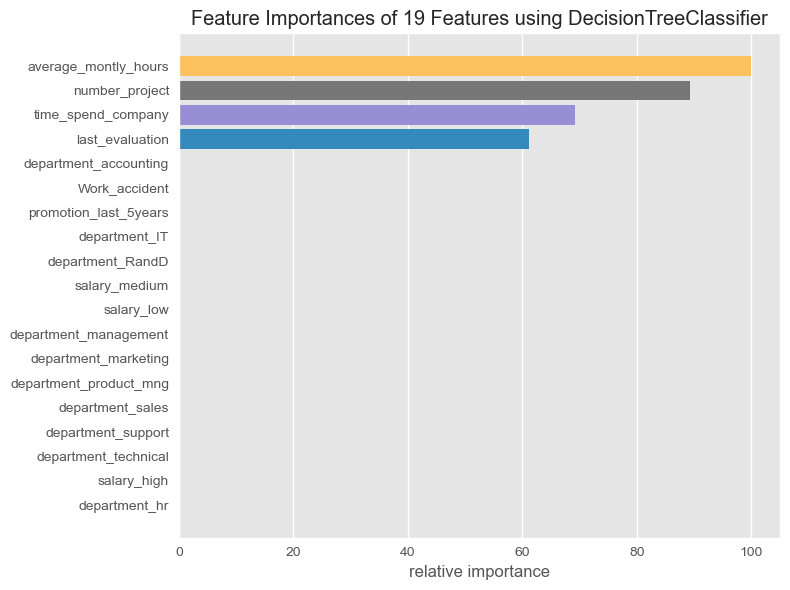

In [33]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=0,
            splitter='best')

# visualizing feature importances for Decision Tree
viz=FeatureImportances(dt)
viz.fit(x_train,y_train)
viz.show();

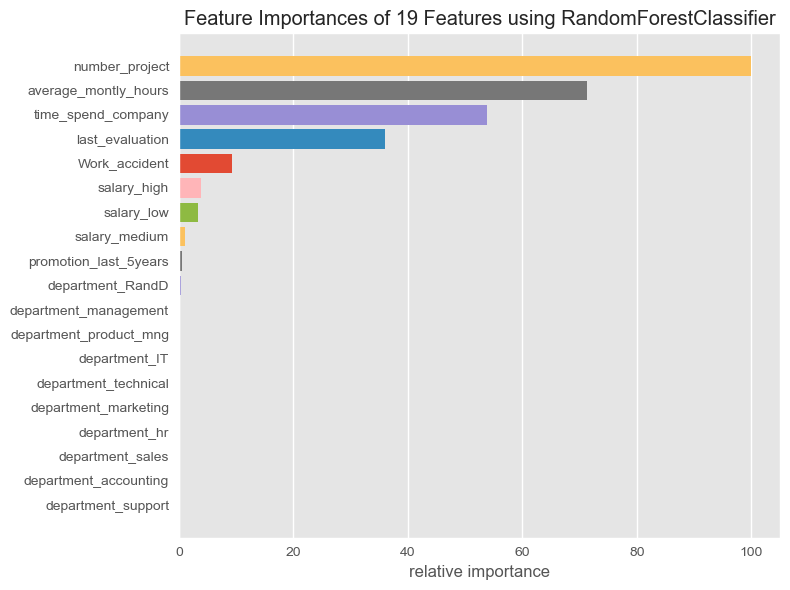

In [34]:
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.20, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

# visualizing feature importances for Random Forest
viz=FeatureImportances(rf)
viz.fit(x_train,y_train)
viz.show();

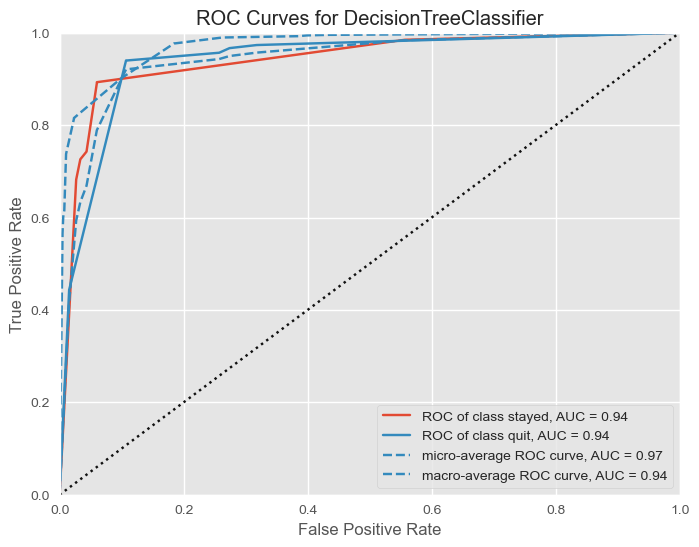

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

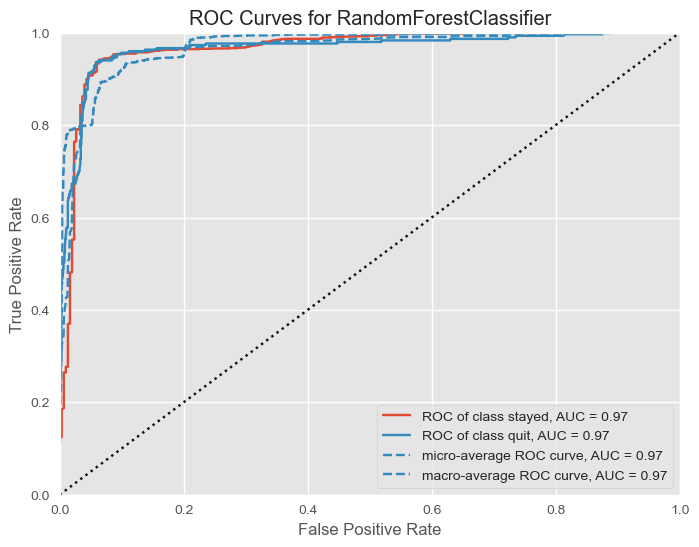

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

## Cross Validation Score

In [37]:
# Combine the training and validation sets for cross-validation
x_train_val = pd.concat([x_train, x_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

# Perform cross-validation
cv_scores = cross_val_score(dt, x_train_val, y_train_val, cv=5, scoring='recall')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Precision:", np.mean(cv_scores))

Cross-Validation Scores: [0.92352941 0.94117647 0.93235294 0.90588235 0.93823529]
Mean Precision: 0.9282352941176469


In [38]:
# Perform cross-validation
cv_scores_rf = cross_val_score(rf, x_train_val, y_train_val, cv=5, scoring='recall')

# Display the cross-validation scores for Random Forest
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean Precision (Random Forest):", np.mean(cv_scores_rf))

Cross-Validation Scores (Random Forest): [0.48529412 0.53823529 0.50882353 0.45       0.47352941]
Mean Precision (Random Forest): 0.4911764705882352


## F1 Score Calculation

In [39]:
# calculating F1 score for decision tree
f1_decision_tree = f1_score(y_test, dt.predict(x_test), average='binary', pos_label=1)
# Print the F1 scores --> quit
print(f'Decision Tree F1 Score: {f1_decision_tree:.3f}')

Decision Tree F1 Score: 0.766


In [40]:
# calculating F1 score for decision tree
f1_decision_tree = f1_score(y_test, dt.predict(x_test), average='binary', pos_label=0)
# Print the F1 scores --> did not quit
print(f'Decision Tree F1 Score: {f1_decision_tree:.3f}')

Decision Tree F1 Score: 0.937


In [41]:
# calculating F1 score for random forest
f1_random_forest = f1_score(y_test,rf.predict(x_test), average='binary', pos_label=1)
# Print the F1 scores --> quit
print(f'Random Forest F1 Score: {f1_random_forest:.3f}')

Random Forest F1 Score: 0.654


In [42]:
# calculating F1 score for random forest
f1_random_forest = f1_score(y_test, rf.predict(x_test), average='binary', pos_label=0)
# Print the F1 scores --> did not quit
print(f'Random Forest F1 Score: {f1_random_forest:.3f}')

Random Forest F1 Score: 0.947


# -- Trying over-sampling --

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
!pip install imbalanced-learn

In [45]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training set
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [46]:
# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("\nClass distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution before SMOTE:
 0    6706
1    1400
Name: quit, dtype: int64

Class distribution after SMOTE:
 0    6706
1    6706
Name: quit, dtype: int64


## Task 6: Building an Interactive Decision Tree Classifier

In [47]:

@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=5,max=20,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,
                                    criterion=crit,
                                    splitter=split,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(x_train_resampled, y_train_resampled)
    # Store the trained model in the global variable
    global decision_tree_model
    decision_tree_model = estimator
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train_resampled,estimator.predict(x_train_resampled))))
    print('Decision Tree Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    
    graph=Source(tree.export_graphviz(estimator,out_file=None,
                                     feature_names=x_train_resampled.columns,
                                     class_names=['stayed','quit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Task 7: Build an Interactive Random Forest Classifier

In [48]:
# random_forest_model = None
# n_estimators = 50 to 200, max_depth = 5-20, min_samples_split = 2-10

@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=[True,False],
                 depth=IntSlider(min=5,max=20,value=3, continuous_update=False),
                 forests=IntSlider(min=50,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=10,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False)
    estimator.fit(x_train_resampled, y_train_resampled)
    global random_forest_model
    random_forest_model = estimator
   
    print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train_resampled,estimator.predict(x_train_resampled))))
    print('Random Forests Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    num_tree  = estimator.estimators_[0]
    print('\visualizing Tree: ', 0)
    graph=Source(tree.export_graphviz(num_tree,
                                         out_file=None,
                                     feature_names=x_train_resampled.columns,
                                     class_names=['stayed','guit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Task 8: Feature Importance and Evaluation Metrics

In [49]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use("ggplot")

In [50]:
# pip install -U scikit-learn

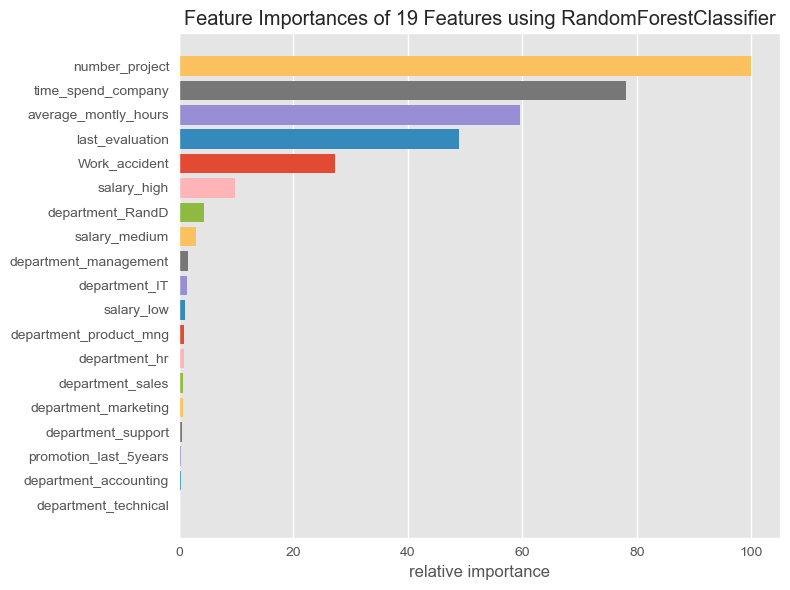

In [51]:
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.20, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

# visualizing feature importances for Random Forest
viz=FeatureImportances(rf)
viz.fit(x_train_resampled,y_train_resampled)
viz.show();

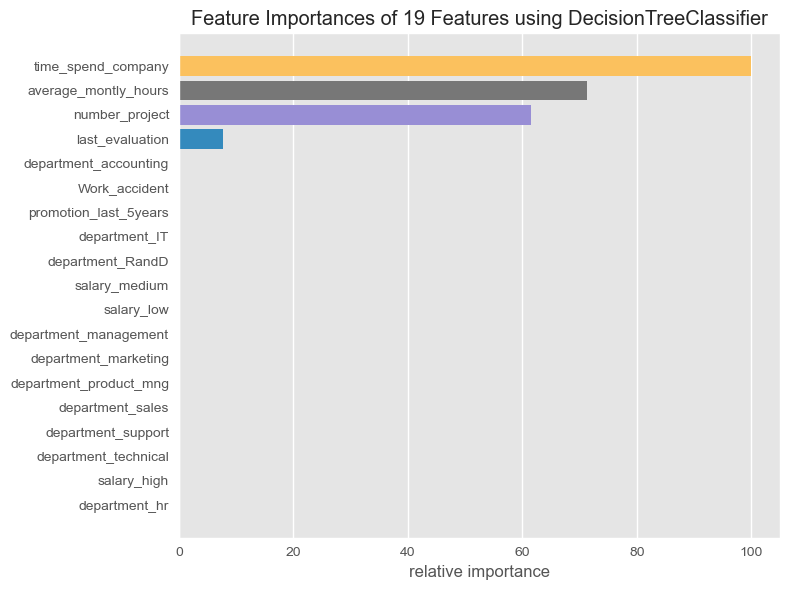

In [52]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=0,
            splitter='best')

# visualizing feature importances for Decision Tree
viz=FeatureImportances(dt)
viz.fit(x_train_resampled,y_train_resampled)
viz.show();

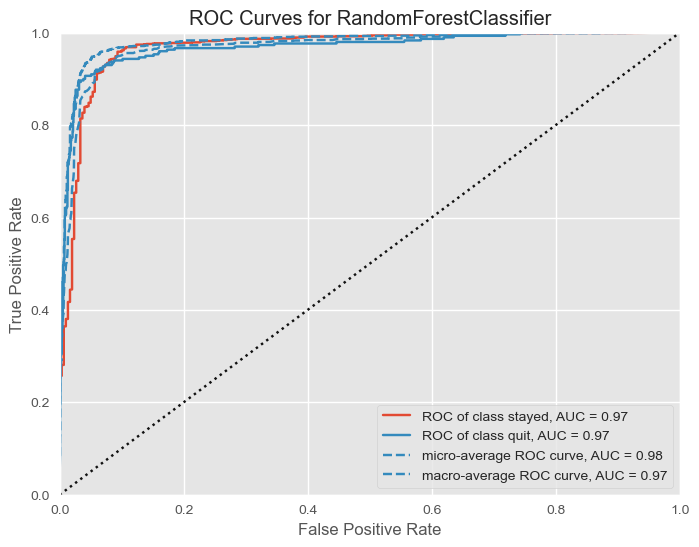

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(x_train_resampled,y_train_resampled)
visualizer.score(x_test,y_test)
visualizer.poof()

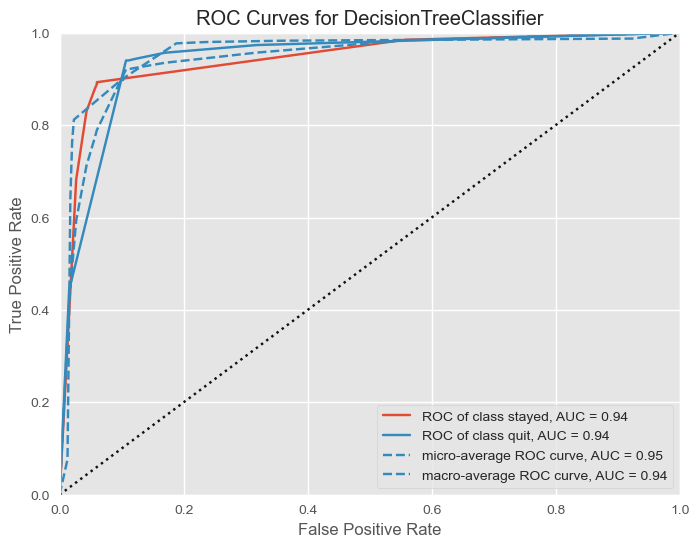

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(x_train_resampled,y_train_resampled)
visualizer.score(x_test,y_test)
visualizer.poof()

## Cross Validation Score

In [55]:
# Combine the training and validation sets for cross-validation
x_train_val = pd.concat([x_train_resampled, x_val], axis=0)
y_train_val = pd.concat([y_train_resampled, y_val], axis=0)

# Perform cross-validation
cv_scores = cross_val_score(dt, x_train_val, y_train_val, cv=5, scoring='recall')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Precision:", np.mean(cv_scores))

Cross-Validation Scores: [0.93147752 0.93718772 0.9407566  0.94579173 0.94718059]
Mean Precision: 0.9404788305887074


In [56]:
# Perform cross-validation
cv_scores_rf = cross_val_score(rf, x_train_val, y_train_val, cv=5, scoring='recall')

# Display the cross-validation scores for Random Forest
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean Precision (Random Forest):", np.mean(cv_scores_rf))

Cross-Validation Scores (Random Forest): [0.86723769 0.92433976 0.92719486 0.93009986 0.92862241]
Mean Precision (Random Forest): 0.9154989150810355


## F1 Score Calculation

In [57]:
# calculating F1 score for decision tree
f1_decision_tree = f1_score(y_test, dt.predict(x_test), average='binary', pos_label=1)
# Print the F1 scores --> quit
print(f'Decision Tree F1 Score: {f1_decision_tree:.3f}')

Decision Tree F1 Score: 0.760


In [58]:
# calculating F1 score for decision tree
f1_decision_tree = f1_score(y_test, dt.predict(x_test), average='binary', pos_label=0)
# Print the F1 scores --> did not quit
print(f'Decision Tree F1 Score: {f1_decision_tree:.3f}')

Decision Tree F1 Score: 0.935


In [59]:
# calculating F1 score for random forest
f1_random_forest = f1_score(y_test,rf.predict(x_test), average='binary', pos_label=1)
# Print the F1 scores --> quit
print(f'Random Forest F1 Score: {f1_random_forest:.3f}')

Random Forest F1 Score: 0.858


In [60]:
# calculating F1 score for random forest
f1_random_forest = f1_score(y_test, rf.predict(x_test), average='binary', pos_label=0)
# Print the F1 scores --> did not quit
print(f'Random Forest F1 Score: {f1_random_forest:.3f}')

Random Forest F1 Score: 0.968


# Trying Under-sampling

In [61]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
# Create an instance of RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Fit and transform the training set
x_train_undersampled, y_train_undersampled = under_sampler.fit_resample(x_train, y_train)

In [63]:
print("Class Distribution Before Under-Sampling:")
print(y_train.value_counts())

print("\nClass Distribution After Under-Sampling:")
print(pd.Series(y_train_undersampled).value_counts())

Class Distribution Before Under-Sampling:
0    6706
1    1400
Name: quit, dtype: int64

Class Distribution After Under-Sampling:
0    1400
1    1400
Name: quit, dtype: int64


# Building an Interactive Decision Tree Classifier

In [64]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,
                                    criterion=crit,
                                    splitter=split,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(x_train_undersampled, y_train_undersampled)
    # Store the trained model in the global variable
    global decision_tree_model
    decision_tree_model = estimator
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train_undersampled,estimator.predict(x_train_undersampled))))
    print('Decision Tree Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    
    graph=Source(tree.export_graphviz(estimator,out_file=None,
                                     feature_names=x_train_undersampled.columns,
                                     class_names=['stayed','quit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Building an Interactive Random Forest Classifier

In [65]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=[True,False],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False)
    estimator.fit(x_train_undersampled, y_train_undersampled)
    global random_forest_model
    random_forest_model = estimator
   
    print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train_undersampled,estimator.predict(x_train_undersampled))))
    print('Random Forests Testing Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    num_tree  = estimator.estimators_[0]
    print('\visualizing Tree: ', 0)
    graph=Source(tree.export_graphviz(num_tree,
                                         out_file=None,
                                     feature_names=x_train_undersampled.columns,
                                     class_names=['stayed','quit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Feature Importance and Evaluation Metrics

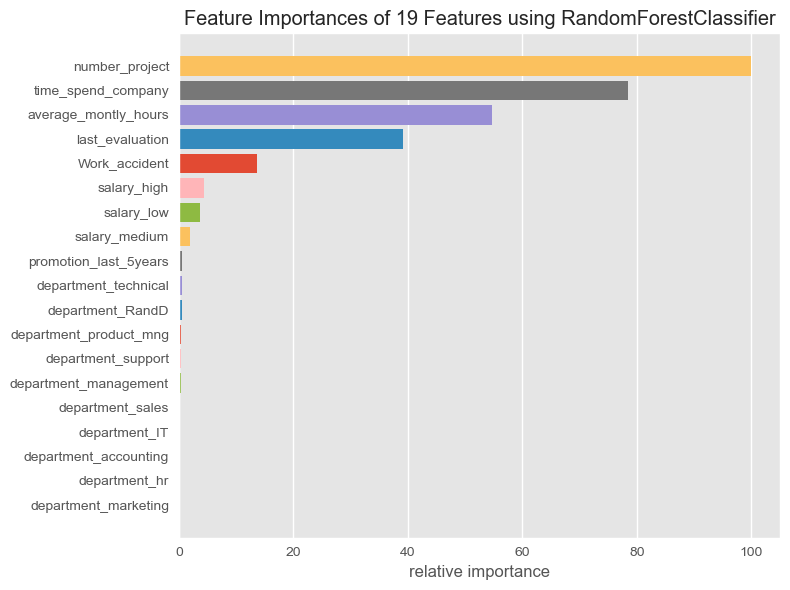

In [66]:
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.20, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

# visualizing feature importances for Random Forest

viz=FeatureImportances(rf)
viz.fit(x_train_undersampled, y_train_undersampled)
viz.show();

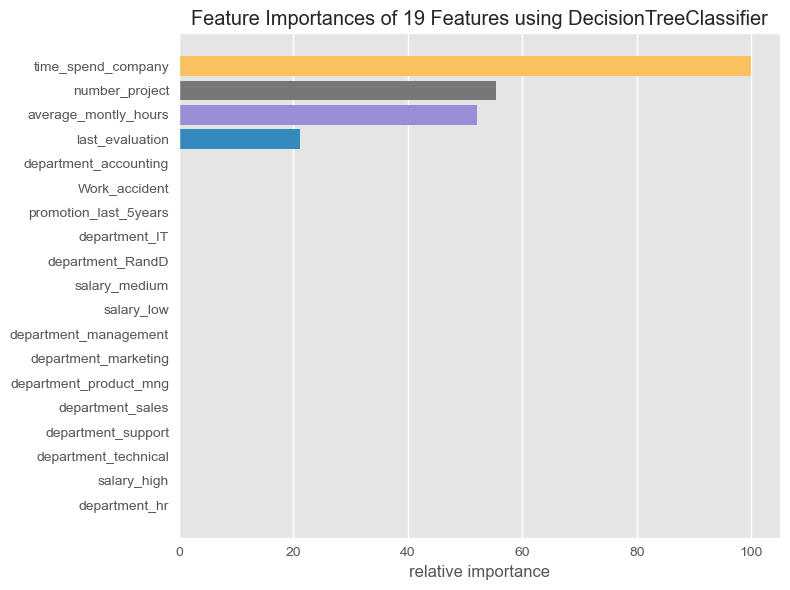

In [67]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=0,
            splitter='best')

# visualizing feature importances for Decision Tree
viz=FeatureImportances(dt)
viz.fit(x_train_undersampled, y_train_undersampled)
viz.show();

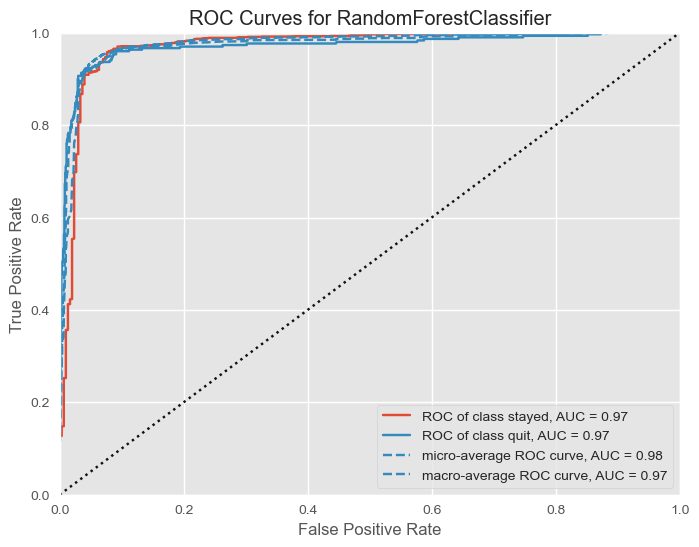

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [68]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(x_train_undersampled, y_train_undersampled)
visualizer.score(x_test,y_test)
visualizer.poof()

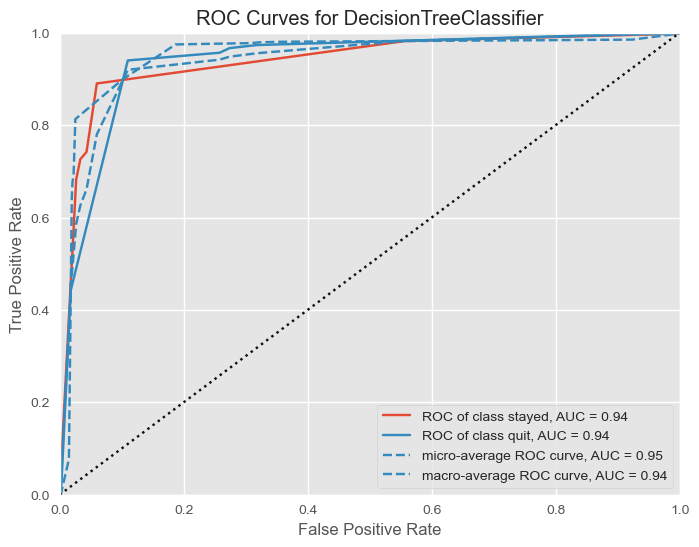

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [69]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(x_train_undersampled, y_train_undersampled)
visualizer.score(x_test,y_test)
visualizer.poof()

# Cross Validation Score

In [70]:
# Combine the training and validation sets for cross-validation
x_train_val = pd.concat([x_train_undersampled, x_val], axis=0)
y_train_val = pd.concat([y_train_undersampled, y_val], axis=0)

# Perform cross-validation
cv_scores = cross_val_score(dt, x_train_val, y_train_val, cv=5, scoring='recall')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Precision:", np.mean(cv_scores))

Cross-Validation Scores: [0.93235294 0.94117647 0.93529412 0.91470588 0.94411765]
Mean Precision: 0.9335294117647057


In [71]:
# Perform cross-validation
cv_scores_rf = cross_val_score(rf, x_train_val, y_train_val, cv=5, scoring='recall')

# Display the cross-validation scores for Random Forest
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean Precision (Random Forest):", np.mean(cv_scores_rf))

Cross-Validation Scores (Random Forest): [0.81764706 0.84705882 0.87647059 0.81470588 0.83235294]
Mean Precision (Random Forest): 0.8376470588235293


# F1 Score Calculation

In [72]:
# calculating F1 score for decision tree
f1_decision_tree = f1_score(y_test, dt.predict(x_test), average='binary', pos_label=1)
# Print the F1 scores --> quit
print(f'Decision Tree F1 Score: {f1_decision_tree:.3f}')

Decision Tree F1 Score: 0.762


In [73]:
# calculating F1 score for decision tree
f1_decision_tree = f1_score(y_test, dt.predict(x_test), average='binary', pos_label=0)
# Print the F1 scores --> did not quit
print(f'Decision Tree F1 Score: {f1_decision_tree:.3f}')

Decision Tree F1 Score: 0.936


In [74]:
# calculating F1 score for random forest
f1_random_forest = f1_score(y_test,rf.predict(x_test), average='binary', pos_label=1)
# Print the F1 scores --> quit
print(f'Random Forest F1 Score: {f1_random_forest:.3f}')

Random Forest F1 Score: 0.849


In [75]:
# calculating F1 score for random forest
f1_random_forest = f1_score(y_test, rf.predict(x_test), average='binary', pos_label=0)
# Print the F1 scores --> did not quit
print(f'Random Forest F1 Score: {f1_random_forest:.3f}')

Random Forest F1 Score: 0.965
